In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of random points
n_points = 10000

# Generate random points in the unit square
x = np.random.rand(n_points)
y = np.random.rand(n_points)

# Calculate the distance from the origin
distance = np.sqrt(x**2 + y**2)

# Determine if points are inside the unit circle
inside_circle = distance <= 1
inside_circle

array([ True,  True,  True, ...,  True,  True,  True])

Estimated value of π: 3.146


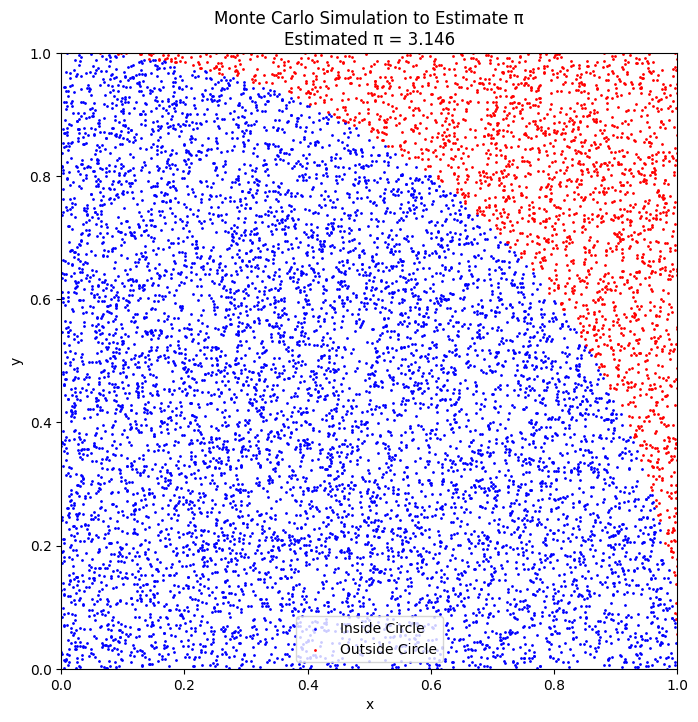

In [2]:
# Estimate π
pi_estimate = (inside_circle.sum() / n_points) * 4

# Print the estimated value of π
print(f"Estimated value of π: {pi_estimate}")

# Plotting the results
plt.figure(figsize=(8, 8))
plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label='Inside Circle')
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label='Outside Circle')
plt.title(f'Monte Carlo Simulation to Estimate π\nEstimated π = {pi_estimate}')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

The estimated price of the European call option is: $10.39


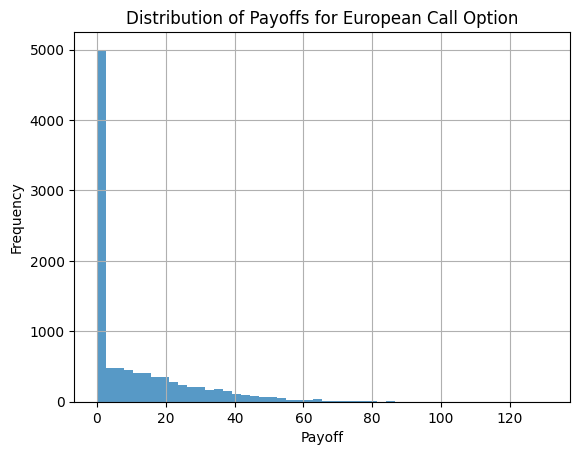

In [6]:
# Parameters for the simulation
S0 = 100  # Current stock price
K = 100   # Strike price
T = 1     # Time to expiration (in years)
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility of the underlying stock
num_simulations = 10000  # Number of simulations

# Monte Carlo Simulation
def monte_carlo_call_option(S0, K, T, r, sigma, num_simulations):
    # Generate random paths for the stock price at expiration
    Z = np.random.normal(0, 1, num_simulations)  # Standard normal random variables
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # Stock price at expiration
    
    # Calculate the payoff for each simulation
    payoffs = np.maximum(ST - K, 0)
    
    # Discount the payoffs back to present value
    discounted_payoffs = np.exp(-r * T) * payoffs
    
    # Calculate the option price as the average of the discounted payoffs
    call_price = np.mean(discounted_payoffs)
    
    return call_price

# Run the simulation
call_option_price = monte_carlo_call_option(S0, K, T, r, sigma, num_simulations)

print(f"The estimated price of the European call option is: ${call_option_price:.2f}")

# Optional: Visualize the distribution of payoffs
payoffs = np.maximum(S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.normal(0, 1, num_simulations)) - K, 0)
plt.hist(payoffs, bins=50, alpha=0.75)
plt.title('Distribution of Payoffs for European Call Option')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid()
plt.show()
